# ReadMe

Unless explicitly specified, the basic units in this notebook are constructed from um, fs and keV without other constant.

In [30]:
import sys
sys.path.append("../../../XRaySimulation")

import numpy as np
import matplotlib.pyplot as plt

from XRaySimulation import util, Crystal

 ![](Example1.png)

# Specify the crystal 

In [31]:
# Initialize the crystals
my_crystal = Crystal.CrystalBlock3D_auto(crystal_type="Diamond",
                                            miller_index="880",
                                            energy_keV=9.84 * 2,
                                            thickness=1e4,
                                            edge_length=5e4,
                                            asymmetry_angle=0.0,
                                            source="x-server")

# Specify incident wave vectors

In [37]:
central_energy = 9.832 * 2 #kev
number_wavevec = 1000  # The number of wave vector to calculate 
energy_range = 1e-4 #keV.  The energy to calculate the reflectivity

In [38]:
# Convert the energy to the wave vector
central_wavevec = np.array([0,0, util.kev_to_wavevec_length(central_energy)])

# Get the wave vector array and other axes info
k_in_grid, axis_info = util.get_k_mesh_1d(number = number_wavevec, energy_range = energy_range)

# Add the reference wave vector to the wave vector
k_in_grid += central_wavevec[np.newaxis, :]

# Define the bragg angle to rotate the wave vector array
bragg = util.get_bragg_angle(wave_length = np.pi * 2 / util.kev_to_wavevec_length(energy=central_energy),
                             plane_distance = np.pi * 2 / my_crystal.h_len)
print("The bragg angle is {:.2f} degree".format(np.rad2deg(bragg)))

# Ajust the Bragg angle a bit
"""
This is just used to shift the rocking curve to the center.
This is not necessary.
"""
#bragg += 11e-6

# Get the rotation matrix for the rotation
rot_mat = util.rot_mat_in_yz_plane(theta= bragg)

# Rotate the wave vectors
k_in_grid = np.dot(k_in_grid, rot_mat.T)

The bragg angle is 89.74 degree


# Get the reflectivity

In [39]:
(reflect_sigma, 
 reflect_pi,
 b,
 kout_grid) = util.get_bragg_reflection_array(kin_grid = k_in_grid,
                                         d = my_crystal.thickness,
                                         h = my_crystal.h,
                                         n = my_crystal.normal,
                                         chi0 = my_crystal.chi0,
                                         chih_sigma = my_crystal.chih_sigma,
                                         chihbar_sigma = my_crystal.chihbar_sigma,
                                         chih_pi = my_crystal.chih_pi,
                                         chihbar_pi = my_crystal.chihbar_pi)
print("Finish calculating the reflectivity")

sigma_reflectivity = np.abs(np.square(reflect_sigma)) / np.abs(b)
pi_reflectivity = np.abs(np.square(reflect_pi)) / np.abs(b)

Finish calculating the reflectivity


# Show the reflectivity

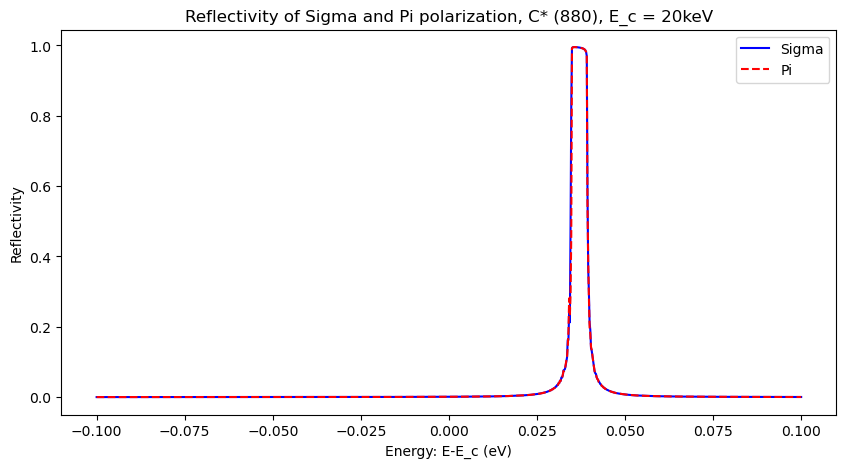

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(5)
fig.set_figwidth(10)

axes.plot(axis_info['energy_grid'] * 1000, sigma_reflectivity,'b', label="Sigma")
axes.plot(axis_info['energy_grid'] * 1000, pi_reflectivity,'r--', label="Pi")

axes.legend(loc = "upper right")
axes.set_title("Reflectivity of Sigma and Pi polarization, C* (880), E_c = 20keV")
axes.set_xlabel("Energy: E-E_c (eV)")
axes.set_ylabel("Reflectivity")

plt.show()


# Get Bandwidth

In [42]:
fwhm_sigma = util.get_fwhm(coordinate=axis_info["energy_grid"],
                           curve_values=sigma_reflectivity)

print("The fwhm of the reflectivity curver of the sigma polarization is")
print("{:.2e} eV".format(fwhm_sigma * 1000))

fwhm_pi = util.get_fwhm(coordinate=axis_info["energy_grid"],
                           curve_values=pi_reflectivity)

print("The fwhm of the reflectivity curver of the pi polarization is")
print("{:.2e} eV".format(fwhm_pi * 1000))

The fwhm of the reflectivity curver of the sigma polarization is
4.60e-03 eV
The fwhm of the reflectivity curver of the pi polarization is
4.40e-03 eV


In [8]:
util.bandwidth_sigma_kev_to_duration_sigma_fs(util.fwhm_to_sigma(5.89e-01 / 1000))

1.3157645985022555

In [10]:
util.sigma_to_fwhm(util.bandwidth_sigma_kev_to_duration_sigma_fs(util.fwhm_to_sigma(4.8e-01 / 1000)))

3.801981319364748

In [14]:
util.intensity_fwhm_to_field_sigma((util.get_intensity_fwhm_duration_from_intensity_bandwidth(4.80e-04)))

1.1416612401191175